Load Libraries

In [4]:
from sklearn.metrics import mean_squared_error,explained_variance_score,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.kernel_ridge import KernelRidge

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [6]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Load data and explore

In [165]:
df= pd.read_csv('train.csv')
df.isnull().values.any()

False

In [166]:
df.head()

,index,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0,285,0.00906,90.0,2.97,0,0.400,7.088,20.8,7.3073,1,285,15.3,394.72,7.85,32.2
1,1,47,0.18836,0.0,6.91,0,0.448,5.786,33.3,5.1004,3,233,17.9,396.90,14.15,20.0
2,2,58,0.01432,100.0,1.32,0,0.411,6.816,40.5,8.3248,5,256,15.1,392.90,3.95,31.6
3,3,369,4.89822,0.0,18.10,0,0.631,4.970,100.0,1.3325,24,666,20.2,375.52,3.26,50.0
4,4,170,2.44953,0.0,19.58,0,0.605,6.402,95.2,2.2625,5,403,14.7,330.04,11.32,22.3


In [167]:
len(df)

250

Drop lavbels that seem unrelated to the problem

In [168]:
df = df.drop(labels=['index'],axis=1)

In [169]:
df = df.drop(labels=['ID','dis','rad','age'],axis=1)
# df = df.drop(labels=['ID','dis','rad','age','nox','rm'],axis=1)

Explore

Plot correlation matrix/heatmap to understand which features might be important

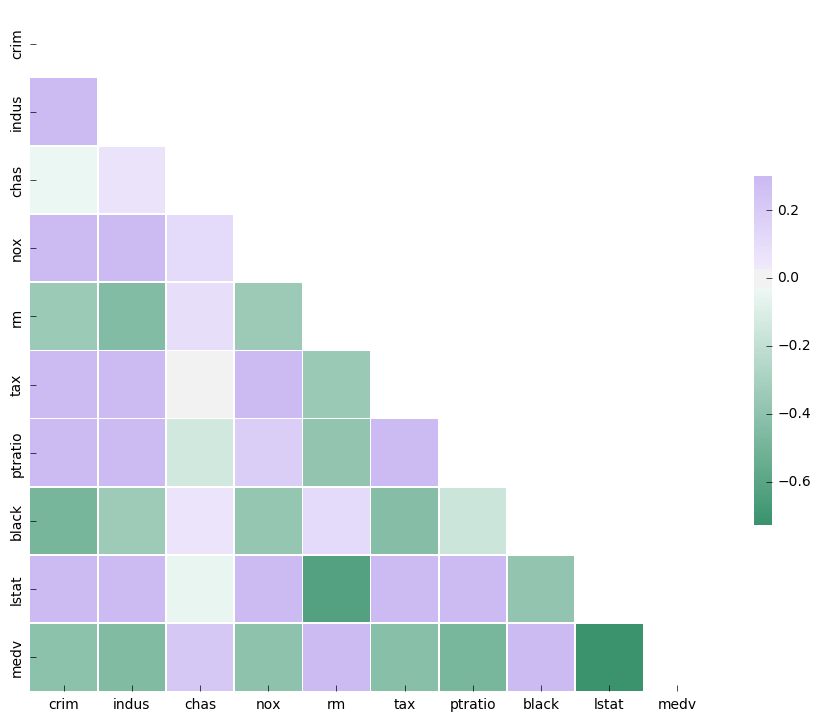

In [391]:
#TODO

corr = df.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

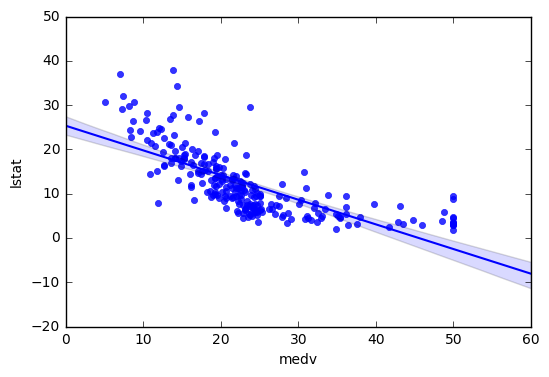

In [126]:
sns.regplot(x=df['medv'], y=df['lstat'])
plt.show()

Normalize

In [170]:
X = df.drop(labels=['medv'],axis=1)
#X=df[['lstat','ptratio']]
y = df['medv']

In [171]:
 scaler = MinMaxScaler()
# scaler=StandardScaler()
# scaler=RobustScaler()
X = scaler.fit_transform(X)

Introducing polynomial features

In [96]:
# poly = PolynomialFeatures(degree=2)

In [97]:
# X= poly.fit_transform(X)

Basic linear regression

In [410]:
regressor5=KernelRidge()
regressor5.fit(X,y)

KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='linear',
      kernel_params=None)

Trying other regressors and using grid search to optimize. Best accuracy is with RandomForestRegressor

In [172]:
#TODO

regressor = DecisionTreeRegressor()
regressor2=RandomForestRegressor()
regressor3=SVR()
regressor4=MLPRegressor()
regressor6=Ridge()

In [191]:
# parameters = {'kernel': ['linear','poly','rbf','sigmoid'],
#              'epsilon':[0.01,0.1,1]}
parameters = {'n_estimators': [2,5,7,10,15,20,25,30,40,50,60,75,80,100],'max_features':["auto","sqrt","log2"]}
# parameters={
#     'alpha' : [0.0001,0.001,0.01,1]
# }

In [192]:
scorer = make_scorer(r2_score) 

In [193]:
grid_obj = GridSearchCV(regressor2,parameters,scoring=scorer)         #Initialize a GridSearchCV object with above parameters,scorer and classifier

grid_fit = grid_obj.fit(X,y)        #Fit the gridsearch object with X_train,y_train

best_regressor = grid_fit.best_estimator_ 

Testing

Load file

In [176]:
df_t=pd.read_csv('test.csv')
Pid=df_t['index']
dfp=pd.DataFrame(Pid)
X_test=df_t.drop(labels=['index'],axis=1)

Normalize etc

In [177]:
X_test=X_test.drop(labels=['ID','dis','rad','age'],axis=1)
# X_test=X_test.drop(labels=['ID','dis','rad','age','nox','rm'],axis=1)

In [104]:
X_test.head()

,crim,zn,indus,chas,nox,rm,ptratio,black,lstat
0,25.04610,0.0,18.10,0,0.693,5.987,20.2,396.90,26.77
1,0.13058,0.0,10.01,0,0.547,5.872,17.8,338.63,15.37
2,0.13117,0.0,8.56,0,0.520,6.127,20.9,387.69,14.09
3,6.80117,0.0,18.10,0,0.713,6.081,20.2,396.90,14.70
4,0.04462,25.0,4.86,0,0.426,6.619,19.0,395.63,7.22


In [151]:
X_test.isnull().values.any()

False

In [278]:
#X_test=X_test[['lstat','ptratio']]

In [178]:
X_test=scaler.transform(X_test)

In [139]:
#X_test=poly.transform(X_test)

Predict

In [417]:
#TODO
# y_pred = regressor5.predict(X_test)

In [194]:
y_pred=best_regressor.predict(X_test)

Write to file

In [195]:
dfy=pd.DataFrame(y_pred)
dfy.columns=['medv']
resultsF=[dfp,dfy]
finalSub = pd.concat(resultsF,axis=1)
finalSub.to_csv("out.csv",index=False)